<a href="https://colab.research.google.com/github/mzafir/aps/blob/master/P3_Mohammad_Asim_Zafir_ML_MINIPROJECT_2_03_28_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LOAD THE FACEBOOK_COMBINED.TXT INTO THE RUNTIME BEFORE RUNNING THIS PROJECT.

In [ ]:
!pip install networkx pandas numpy scikit-learn


**Steps**
1. Load The Graph Data
2. Generate the Node features ( Understand what each Node does)
3. Check for missing values, any duplicate rows ? (Scale?)
4. Plot historgram for each feature
5. Plot scatter plots between each feature. Any insights?
6. Test Kmeans ( Use Elbow Method to find a good K)
7. Test DBSCAN
8. Test GMM
9. Analyze and Validate  
Plot graphs visualzing the different clusters


In [ ]:
import networkx as nx

# Load The Graph

G = nx.read_edgelist("facebook_combined.txt",create_using=nx.Graph(),nodetype=int)

print(f"Numer of Edges : {G.number_of_edges()}")
print(f"Number of Nodes : {G.number_of_nodes()}")


Numer of Edges : 88234
Number of Nodes : 4039


In [ ]:
import networkx as nx
import random

# Assuming 'G' is your original graph with 4000 nodes
G = nx.generators.random_graphs.erdos_renyi_graph(4000, 0.01)

# Randomly sample 400 nodes
sampled_nodes = random.sample(G.nodes(), 400)

# Create a subgraph with the sampled nodes
subG = G.subgraph(sampled_nodes)

# Now, 'subG' is your smaller graph with approximately 400 nodes


<ipython-input-5-75a09fb5d1aa>:8: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  sampled_nodes = random.sample(G.nodes(), 400)


NOTE: Initiliazing the networkx library and reading the dataset into the Graph object "G".

In this step - identify number of edges inbound to a given Node and also identify total number of edges as well as nodes


# EDA AND FEATURE ENGINEERING

In [ ]:
# Node Degree
degree_dict = dict(G.degree())

#Clustering Coefficient
clustering_dict = dict(nx.clustering(G))

# EigenVector Centrality
eigen_vector_centrality = nx.eigenvector_centrality(G)

#Average Neighbor Degree
average_neighbor_degree_dict = nx.average_neighbor_degree(G)

#Degree Centrality
degree_centrality_dict = nx.degree_centrality(G)

#Eccentricity
eccentricity_dict = nx.eccentricity(G)

#Closeness Centrality
closeness_centrality_dict = nx.closeness_centrality(G)

#Betweeness Centrality
betweenness_centrality_dict = nx.betweenness_centrality(G)



In [ ]:

# Degree: This is the most basic and intuitive measure of a node's connectivity; it counts how many connections (edges) a node has.
#In undirected graphs, it simply counts all the edges attached to a node. In directed graphs, you can have in-degree and out-degree, counting incoming and outgoing connections separately.

# Clustering Coefficient: This measures the degree to which nodes in a graph tend to cluster together. Specifically, for a given node, it represents the likelihood that its neighbors are also connected with each other. It's a measure of the local group cohesiveness around a node.

# Average Neighbor Degree: This metric calculates the average degree of all the neighbors of each node. It provides insight into the connectivity of a node's immediate network, indicating whether a node is surrounded by highly connected or sparsely connected nodes.

# Degree Centrality: Similar to the degree but normalized to lie between 0 and 1, degree centrality measures a node's relative importance based on the number of connections it has to other nodes in the network. It's calculated as the degree of the node divided by the maximum possible degree in the graph.

# Eccentricity: This metric measures the greatest distance between a node and all other nodes in the graph. In other words, it's the maximum number of edges that need to be traversed to reach the furthest node in the graph from the given node. Nodes with low eccentricity are more central because they are closer to all other nodes.

# Closeness Centrality: This metric measures how close a node is to all other nodes in the network, calculated as the reciprocal of the sum of the shortest path distances from a node to all other nodes. It reflects how easily a node can reach all other nodes, with higher values indicating shorter paths to all others, implying a more central position in the network.

# Betweenness Centrality: This measures the extent to which a node lies on the shortest paths between other nodes. It quantifies the number of times a node acts as a bridge along the shortest path between two other nodes. This metric identifies nodes that serve as critical connectors or 'bottlenecks' in the network, through which a large amount of network traffic can flow.



import pandas as pd


features_df = pd.DataFrame({
    "Degree" : pd.Series(degree_dict),
    "Clustering_Coefficient" : pd.Series(clustering_dict),
    "EigenVector_Centrality" : pd.Series(eigen_vector_centrality),
    "Average Neighbor Degree": pd.Series(average_neighbor_degree_dict),
    "Degree Centrality"     : pd.Series(degree_centrality_dict),
    "Eccentricity"          : pd.Series(eccentricity_dict),
    "Closeness Centrality"   : pd.Series(closeness_centrality_dict),
    "Betweenness Centrality" : pd.Series(betweenness_centrality_dict),
})



In [ ]:
features_df.head()

,Degree,Clustering_Coefficient,EigenVector_Centrality,Average Neighbor Degree,Degree Centrality,Eccentricity,Closeness Centrality,Betweenness Centrality
0,37,0.004505,0.014150,40.054054,0.009252,3,0.372589,0.000356
1,41,0.008537,0.016446,41.658537,0.010253,3,0.378299,0.000428
2,39,0.009447,0.015597,41.358974,0.009752,3,0.377229,0.000386
3,42,0.017422,0.016561,41.119048,0.010503,3,0.378514,0.000444
4,38,0.014225,0.015155,41.657895,0.009502,3,0.375458,0.000365


In [ ]:

features_df.describe()

#checking for missing values and analyzing the dataset

,Degree,Clustering_Coefficient,EigenVector_Centrality,Average Neighbor Degree,Degree Centrality,Eccentricity,Closeness Centrality,Betweenness Centrality
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,39.808000,0.010100,0.015609,40.769438,0.009954,3.025000,0.376548,0.000414
std,6.191383,0.003739,0.002522,0.974735,0.001548,0.156144,0.006274,0.000129
min,21.000000,0.000000,0.008199,37.000000,0.005251,3.000000,0.357149,0.000108
25%,35.000000,0.007536,0.013872,40.129877,0.008752,3.000000,0.372242,0.000321
50%,40.000000,0.009852,0.015491,40.756098,0.010003,3.000000,0.376412,0.000398
75%,44.000000,0.012315,0.017247,41.404762,0.011003,3.000000,0.380712,0.000490
max,61.000000,0.026455,0.024749,44.968750,0.015254,4.000000,0.398307,0.000934


In [ ]:
#NON SCALED FEATURE DATAFRAME
features_df

,Degree,Clustering_Coefficient,EigenVector_Centrality,Average Neighbor Degree,Degree Centrality,Eccentricity,Closeness Centrality,Betweenness Centrality
0,37,0.004505,0.014150,40.054054,0.009252,3,0.372589,0.000356
1,41,0.008537,0.016446,41.658537,0.010253,3,0.378299,0.000428
2,39,0.009447,0.015597,41.358974,0.009752,3,0.377229,0.000386
3,42,0.017422,0.016561,41.119048,0.010503,3,0.378514,0.000444
4,38,0.014225,0.015155,41.657895,0.009502,3,0.375458,0.000365
...,...,...,...,...,...,...,...,...
3995,45,0.011111,0.017484,40.622222,0.011253,3,0.381657,0.000526
3996,34,0.008913,0.013708,41.911765,0.008502,3,0.371965,0.000299
3997,37,0.012012,0.014712,41.459459,0.009252,3,0.374298,0.000346
3998,29,0.007389,0.010786,39.068966,0.007252,3,0.364208,0.000219


In [ ]:
#SCALING METHODS USED
# Min Max , Bound you data between 0 and 1 (x - x_min) / (x_max - x_min)
# Standard Scaling . (X- mean / standard deviation)



In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

features_scaled = scaler.fit_transform(features_df)
features_scaled

#standard scalar : this has a guassian distribution property and ideally all features are centered around mean=0 bounds: (-1,1)
#min-max: bounds (0,1)

array([[-0.45359029, -1.49672939, -0.57863165, ..., -0.16012815,
        -0.63098666, -0.45316791],
       [ 0.19254972, -0.41814605,  0.33201759, ..., -0.16012815,
         0.27915914,  0.10568758],
       [-0.13052028, -0.17469169, -0.00492751, ..., -0.16012815,
         0.10851495, -0.22226457],
       ...,
       [-0.45359029,  0.51153206, -0.35578044, ..., -0.16012815,
        -0.35860728, -0.53192339],
       [-1.74587032, -0.72508213, -1.91271993, ..., -0.16012815,
        -1.96698723, -1.51907576],
       [ 0.19254972, -0.09192602,  0.20064091, ..., -0.16012815,
         0.23925559,  0.10412423]])

In [ ]:
features_scaled = pd.DataFrame(features_scaled,columns=features_df.columns)
features_scaled

,Degree,Clustering_Coefficient,EigenVector_Centrality,Average Neighbor Degree,Degree Centrality,Eccentricity,Closeness Centrality,Betweenness Centrality
0,-0.453590,-1.496729,-0.578632,-0.734019,-0.453590,-0.160128,-0.630987,-0.453168
1,0.192550,-0.418146,0.332018,0.912258,0.192550,-0.160128,0.279159,0.105688
2,-0.130520,-0.174692,-0.004928,0.604892,-0.130520,-0.160128,0.108515,-0.222265
3,0.354085,1.958600,0.377615,0.358716,0.354085,-0.160128,0.313404,0.229154
4,-0.292055,1.103441,-0.179946,0.911599,-0.292055,-0.160128,-0.173756,-0.386408
...,...,...,...,...,...,...,...,...
3995,0.838690,0.270541,0.743493,-0.151051,0.838690,-0.160128,0.814366,0.867799
3996,-0.938195,-0.317547,-0.753902,1.172082,-0.938195,-0.160128,-0.730421,-0.897216
3997,-0.453590,0.511532,-0.355780,0.707995,-0.453590,-0.160128,-0.358607,-0.531923
3998,-1.745870,-0.725082,-1.912720,-1.744767,-1.745870,-0.160128,-1.966987,-1.519076


In [ ]:
import plotly.express as px


In [ ]:

#normalized_df = (features_df - features_df.min()) / (features_df.max() - features_df.min())

#chosed to moved on with standard scalar only but tried min / max as well.

In [ ]:
features_scaled = pd.DataFrame(features_scaled,columns=features_df.columns)
features_scaled

,Degree,Clustering_Coefficient,EigenVector_Centrality,Average Neighbor Degree,Degree Centrality,Eccentricity,Closeness Centrality,Betweenness Centrality
0,-0.453590,-1.496729,-0.578632,-0.734019,-0.453590,-0.160128,-0.630987,-0.453168
1,0.192550,-0.418146,0.332018,0.912258,0.192550,-0.160128,0.279159,0.105688
2,-0.130520,-0.174692,-0.004928,0.604892,-0.130520,-0.160128,0.108515,-0.222265
3,0.354085,1.958600,0.377615,0.358716,0.354085,-0.160128,0.313404,0.229154
4,-0.292055,1.103441,-0.179946,0.911599,-0.292055,-0.160128,-0.173756,-0.386408
...,...,...,...,...,...,...,...,...
3995,0.838690,0.270541,0.743493,-0.151051,0.838690,-0.160128,0.814366,0.867799
3996,-0.938195,-0.317547,-0.753902,1.172082,-0.938195,-0.160128,-0.730421,-0.897216
3997,-0.453590,0.511532,-0.355780,0.707995,-0.453590,-0.160128,-0.358607,-0.531923
3998,-1.745870,-0.725082,-1.912720,-1.744767,-1.745870,-0.160128,-1.966987,-1.519076


# DATASET VISUALIZATION

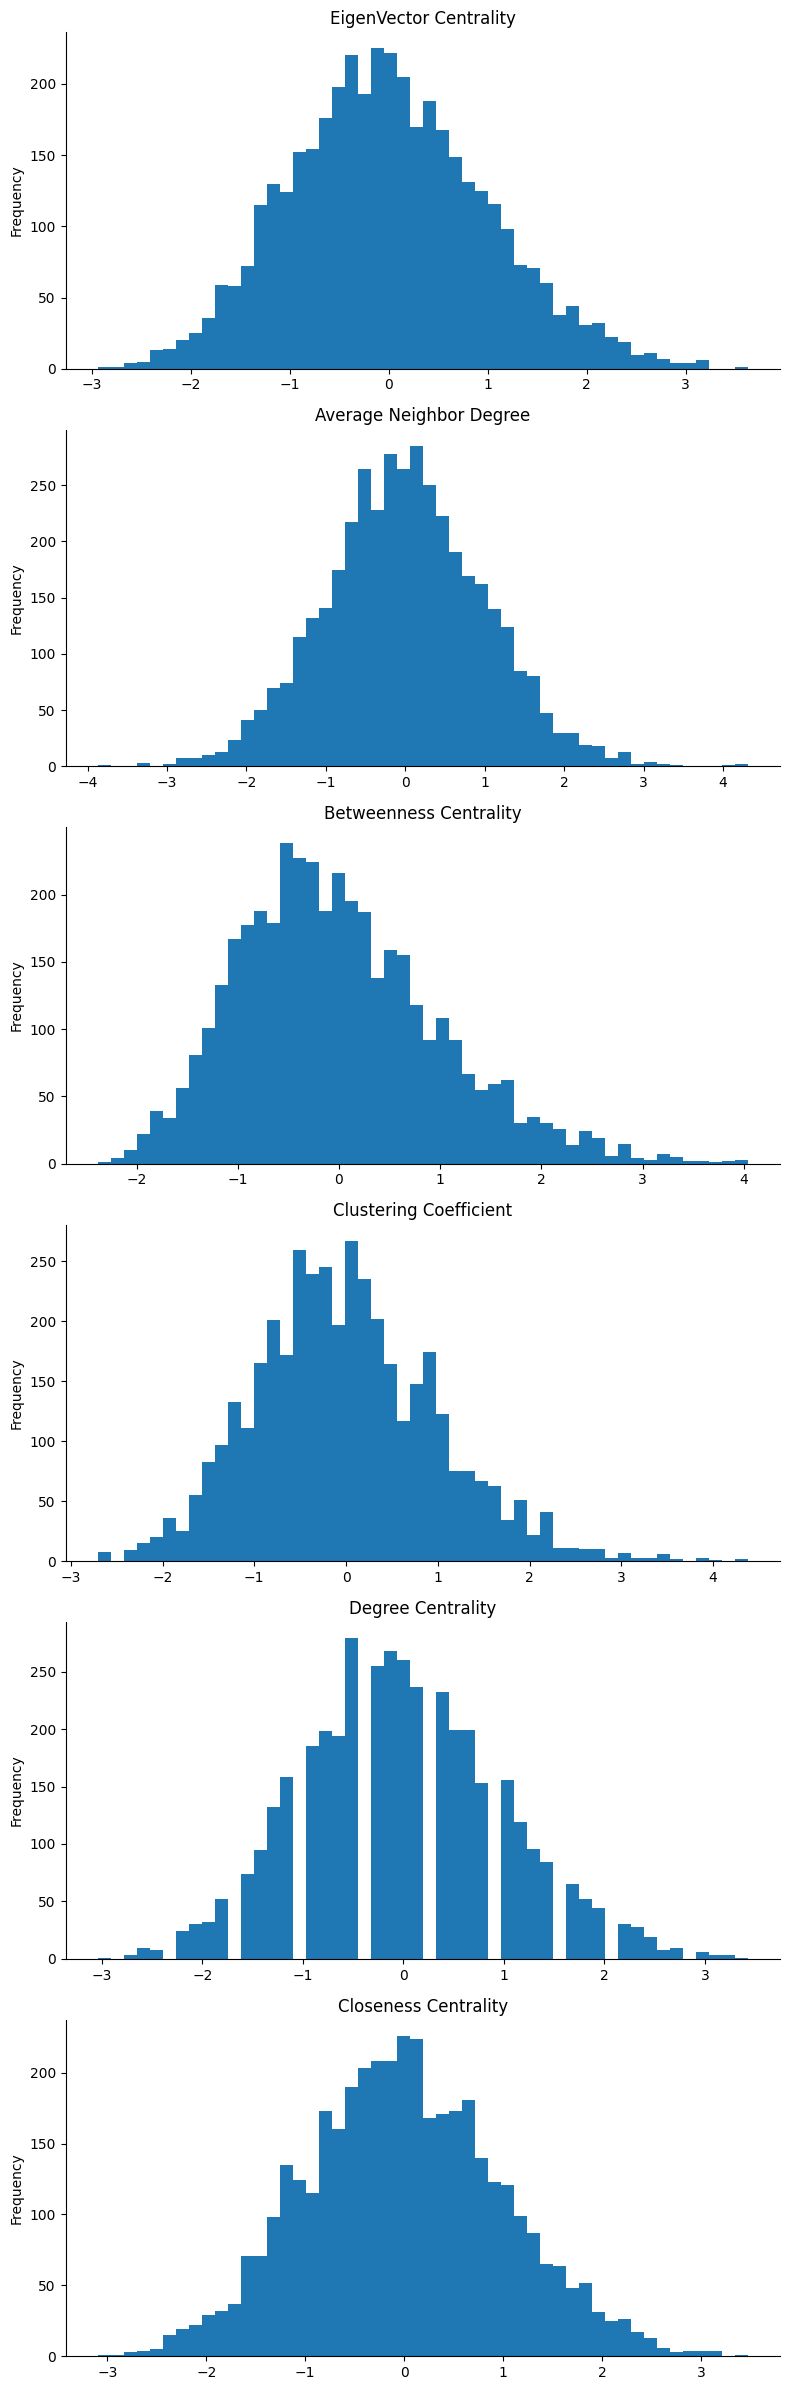

In [ ]:
#Plotting standardized  feature values

from matplotlib import pyplot as plt


fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(8, 24))  # Adjust figsize as needed

features = [
    'EigenVector_Centrality',
    'Average Neighbor Degree',
    'Betweenness Centrality',
    'Clustering_Coefficient',
    'Degree Centrality',
    'Closeness Centrality'
]

titles = [
    'EigenVector Centrality',
    'Average Neighbor Degree',
    'Betweenness Centrality',
    'Clustering Coefficient',
    'Degree Centrality',
    'Closeness Centrality'
]

for ax, feature, title in zip(axes.flatten(), features, titles):
    if feature in features_scaled.columns:  # Check if the column exists
        features_scaled[feature].plot(kind='hist', bins=50, title=title, ax=ax)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


In [ ]:
mean_table=[]
mean_table.append(features_scaled['Degree'].mean())
mean_table.append(features_scaled['Average Neighbor Degree'].mean())
mean_table.append(features_scaled['Betweenness Centrality'].mean())
mean_table.append(features_scaled['Closeness Centrality'].mean())
mean_table.append(features_scaled['Degree Centrality'].mean())
mean_table.append(features_scaled['Eccentricity'].mean())
mean_table.append(features_scaled['EigenVector_Centrality'].mean())


In [ ]:
mean_table

[3.1086244689504386e-17,
 -2.815525590449397e-15,
 -2.788880237858393e-16,
 9.105161069555834e-15,
 -1.1031175972675555e-15,
 6.128431095930864e-16,
 -5.737632591262809e-16]

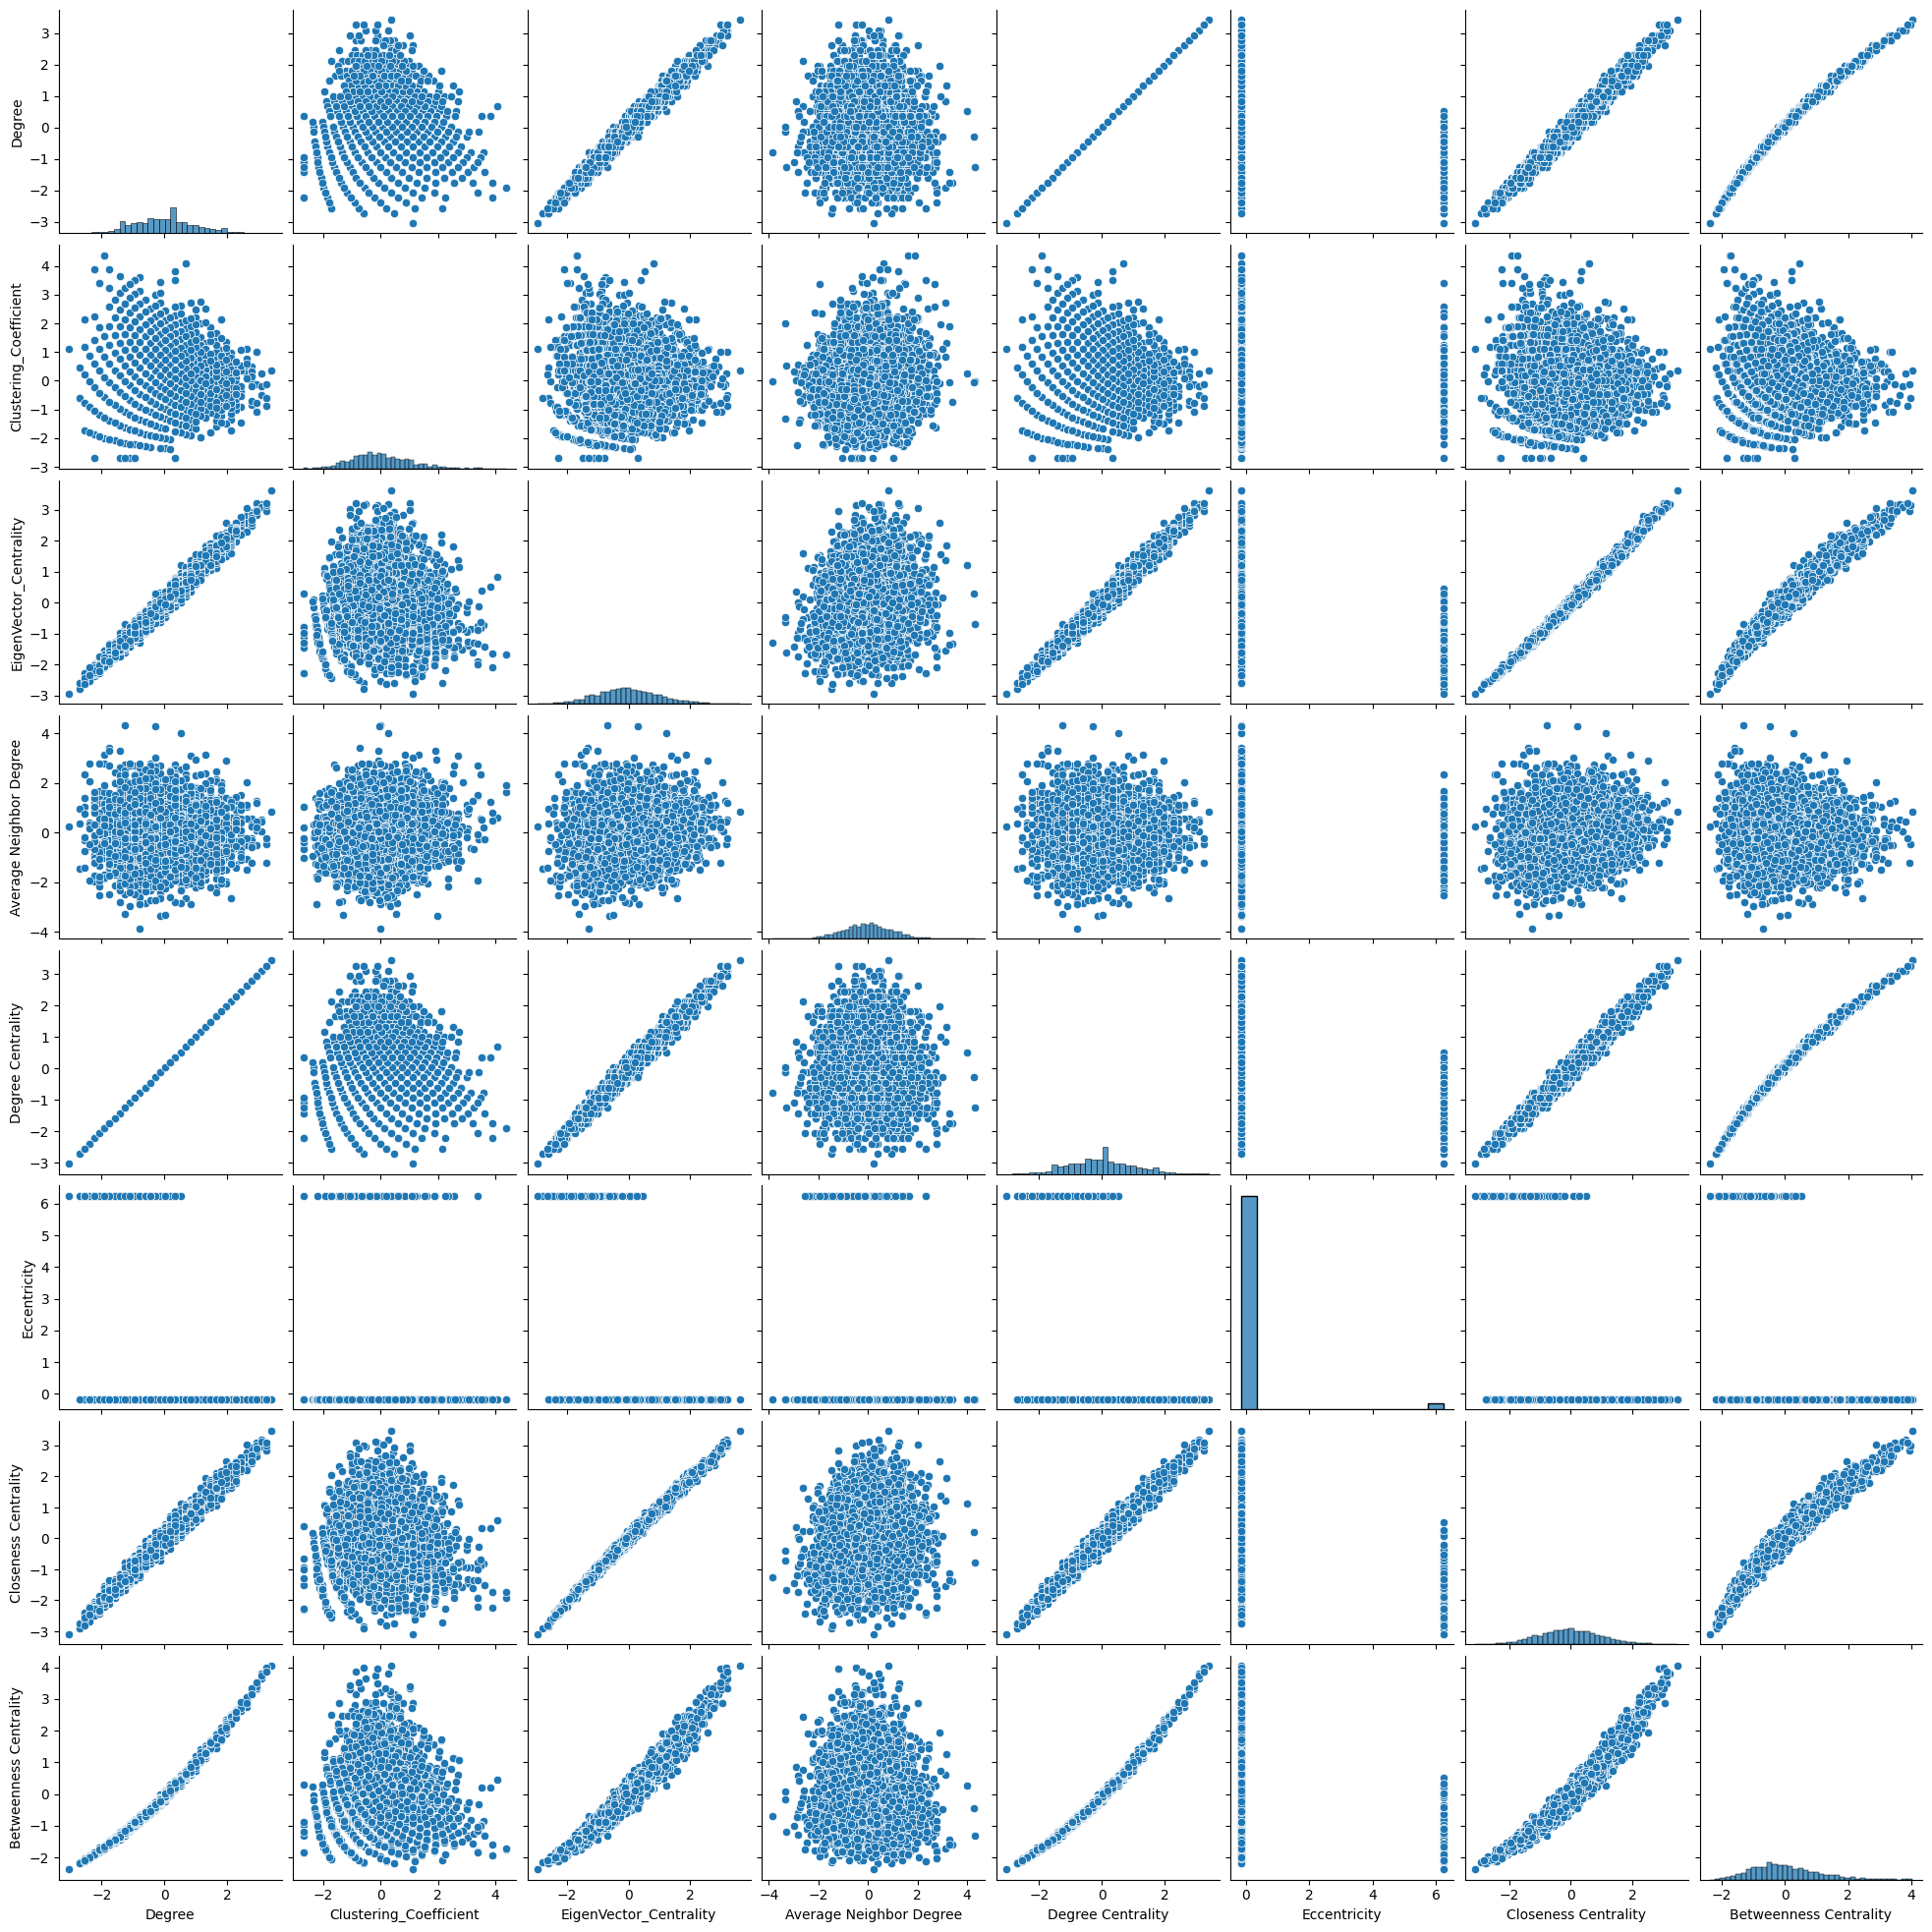

In [ ]:
import seaborn as sns

sns.pairplot(features_scaled)



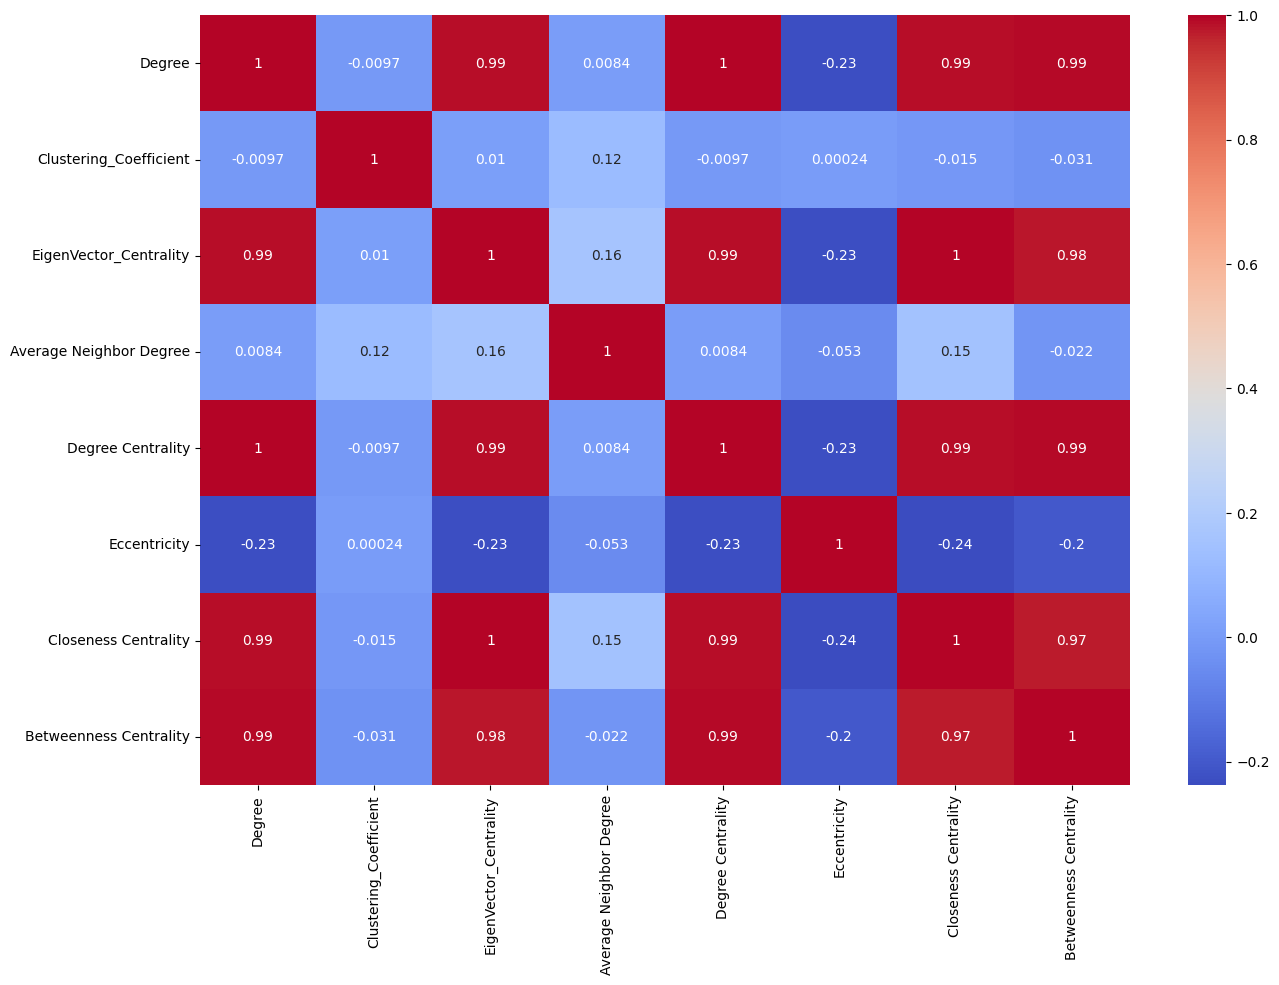

{'Closeness Centrality', 'Betweenness Centrality', 'EigenVector_Centrality', 'Degree Centrality'}


In [ ]:
threshold_val=0.9

correlation_matrix=features_scaled.corr()

correlation_matrix

plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm')
plt.show()

highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold_val:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)

print(highly_correlated_features)


# **CLUSTERING METHODS- "K-MEANS"**

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(3)

features_df['Cluster'] = kmeans.fit_predict(features_df)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
features_df['Cluster'].value_counts()

0    1924
1    1075
2    1001
Name: Cluster, dtype: int64

In [ ]:
from matplotlib import pyplot as plt
wss = []
for i in range(1,15):
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(features_scaled)
    wss.append(kmeans.inertia_)


plt.figure(figsize=(10,6))
plt.plot(range(1,15),wss,marker='o')
plt.title('Elbow Method')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

# NOTE: The technique used in this method is by employing EBLOW METHOD, we identify number for cluster for Kmeans algorith by identifying the biggest intertia drop from the ELBOW plot. This number will be then used by the Kmean clustering algorithm. as it is event the relatively larger drop is between 3 to 5 - hence N value for Kmeans is taken as 3

**Feature Relationship Visualization **

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(3)

features_scaled['Cluster'] = kmeans.fit_predict(features_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


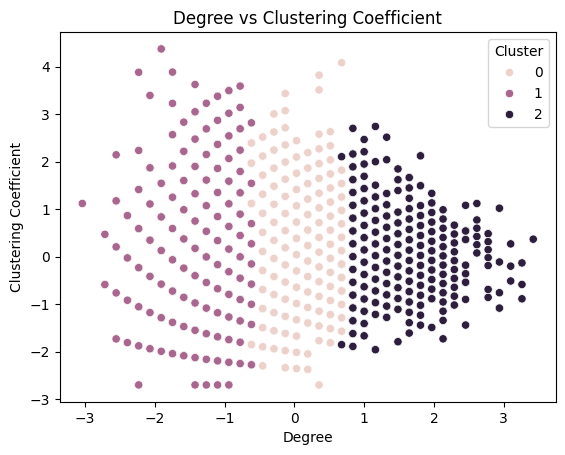

In [ ]:
sns.scatterplot(data=features_scaled,x='Degree',y='Clustering_Coefficient',hue="Cluster")
plt.title("Degree vs Clustering Coefficient")
plt.xlabel('Degree')
plt.ylabel('Clustering Coefficient')
plt.legend(title="Cluster")
plt.show()

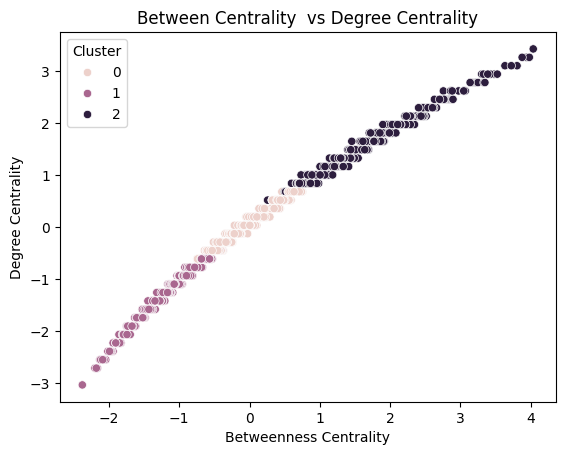

In [ ]:
sns.scatterplot(data=features_scaled,x='Betweenness Centrality',y='Degree Centrality',hue="Cluster")
plt.title("Between Centrality  vs Degree Centrality")
plt.xlabel('Betweenness Centrality')
plt.ylabel('Degree Centrality')
plt.legend(title="Cluster")
plt.show()

# CLUSTER VALIDATION TECHNIQUES

In [ ]:
cluster_labels = kmeans.labels_


In [ ]:
from sklearn.metrics import silhouette_score

kmeans_score = silhouette_score(features_scaled, cluster_labels)
kmeans_score

0.35620789944443665

 silhouette score of 0.3085902950154001 suggests that, on average, the clusters are moderately well defined but not perfectly distinct.

In [ ]:
from sklearn.metrics import davies_bouldin_score

db_index = davies_bouldin_score(features_scaled, cluster_labels)
db_index

1.0509170068194926

A Davies-Bouldin Index of 1.1365278449188165 indicates a moderate level of cluster compactness and separation. It suggests that there's room for improvement, but the clusters are not excessively overlapped or too spread out.

In [ ]:
from sklearn.metrics import calinski_harabasz_score

ch_index = calinski_harabasz_score(features_scaled, cluster_labels)
ch_index


2427.422289413874

A Calinski-Harabasz score of 1280.9232666039757 is relatively high, suggesting that, on average,  clusters are quite compact and well-separated from each other.

Text(0.5, 1.0, 't-SNE Visualization of Clusters')

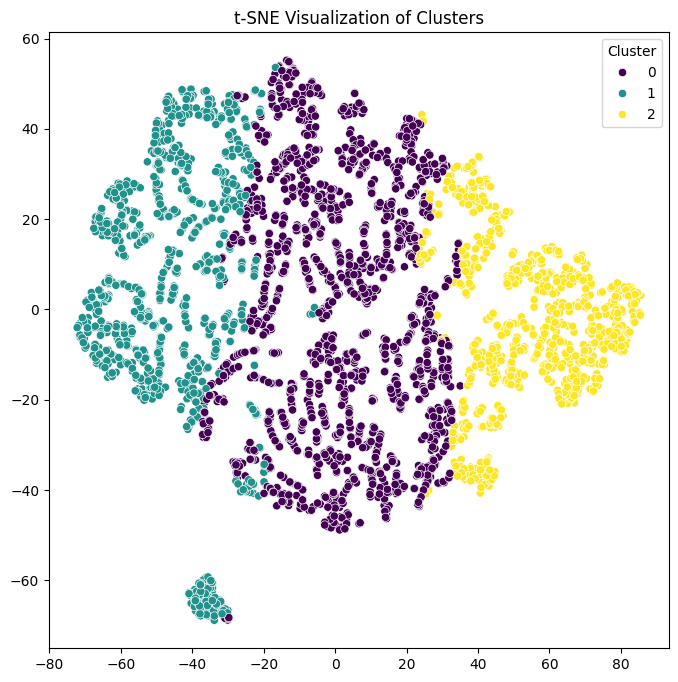

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(features_scaled.drop('Cluster', axis=1))

plt.figure(figsize=(8, 8))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=features_scaled['Cluster'], palette='viridis', legend="full")
plt.title('t-SNE Visualization of Clusters')


In [ ]:
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Performing PCA to reduce to 2 dimensions for visualization
# pca = PCA(n_components=2)
# pca_result = pca.fit_transform(features_scaled)

# # Adding the results back to your DataFrame for easy plotting
# features_scaled['PCA1'] = pca_result[:, 0]
# features_scaled['PCA2'] = pca_result[:, 1]

# # Plotting the first two PCA components with clusters as color
# plt.figure(figsize=(10, 8))
# sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=features_scaled, palette='viridis', legend="full", alpha=0.5)
# plt.title('PCA - First two principal components')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.show()


In [ ]:
features_scaled


,Degree,Clustering_Coefficient,EigenVector_Centrality,Average Neighbor Degree,Degree Centrality,Eccentricity,Closeness Centrality,Betweenness Centrality,Cluster
0,-0.453590,-1.496729,-0.578632,-0.734019,-0.453590,-0.160128,-0.630987,-0.453168,0
1,0.192550,-0.418146,0.332018,0.912258,0.192550,-0.160128,0.279159,0.105688,0
2,-0.130520,-0.174692,-0.004928,0.604892,-0.130520,-0.160128,0.108515,-0.222265,0
3,0.354085,1.958600,0.377615,0.358716,0.354085,-0.160128,0.313404,0.229154,0
4,-0.292055,1.103441,-0.179946,0.911599,-0.292055,-0.160128,-0.173756,-0.386408,0
...,...,...,...,...,...,...,...,...,...
3995,0.838690,0.270541,0.743493,-0.151051,0.838690,-0.160128,0.814366,0.867799,2
3996,-0.938195,-0.317547,-0.753902,1.172082,-0.938195,-0.160128,-0.730421,-0.897216,1
3997,-0.453590,0.511532,-0.355780,0.707995,-0.453590,-0.160128,-0.358607,-0.531923,0
3998,-1.745870,-0.725082,-1.912720,-1.744767,-1.745870,-0.160128,-1.966987,-1.519076,1


In [ ]:
tsne_results

array([[-19.258017 , -39.159554 ],
       [ -1.3050504,  21.691286 ],
       [ -7.635101 ,  16.680355 ],
       ...,
       [-16.174383 ,  14.098062 ],
       [-53.104305 , -19.506739 ],
       [ 14.006399 ,  -9.9033   ]], dtype=float32)

In [ ]:
tsne = TSNE(n_components=3, random_state=42)
tsne_results = tsne.fit_transform(features_scaled.drop('Cluster', axis=1))
tsne_results

array([[ -6.001851  ,  -7.3595896 ,  -6.499151  ],
       [  2.2632349 ,   3.7074044 ,  -4.5402656 ],
       [ -1.3114399 ,   2.403035  ,  -3.3481355 ],
       ...,
       [ -5.114571  ,   4.3314276 ,   0.27987862],
       [-16.376787  ,  -6.353539  ,  -3.7409813 ],
       [  2.2631571 ,  -0.3041061 ,  -1.0774581 ]], dtype=float32)

# **CLUSTERING METHOD - "DBSCAN"**

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np

dbscan = DBSCAN(eps=0.5, min_samples=2).fit(features_scaled)

# Get the cluster labels (note: '-1' means outlier)
labels = dbscan.labels_

# Print cluster labels
print(labels)


[0 0 0 ... 0 2 0]


In [ ]:
from sklearn.metrics import silhouette_score

# Assuming 'features_scaled' is your scaled dataset and 'labels' are the labels from DBSCAN
score_dbscan = silhouette_score(features_scaled, labels)

print('Silhouette Score: %.3f' % score_dbscan)

Silhouette Score: 0.383


In [ ]:
from sklearn.metrics import calinski_harabasz_score
ch_score_dbscan = calinski_harabasz_score(features_scaled, labels)
print("Calinski-Harabasz Score: ", ch_score_dbscan)

Calinski-Harabasz Score:  2632.989199541128


In [ ]:
from sklearn.metrics import davies_bouldin_score

db_index_dbscan = davies_bouldin_score(features_scaled, labels)
db_index_dbscan

0.8796321225856658

silhouette score of 0.119 suggests that, on average, the clusters are moderately well defined but not perfectly distinct.

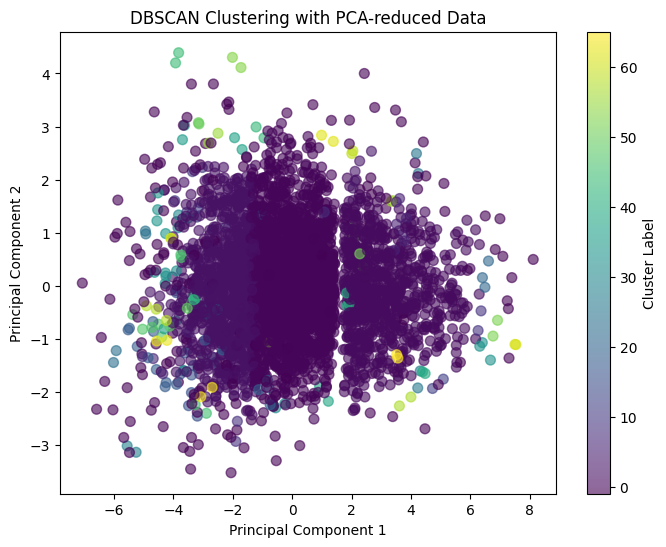

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce the dimensionality to 2 components for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features_scaled)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6)
plt.title("DBSCAN Clustering with PCA-reduced Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster Label')
plt.show()

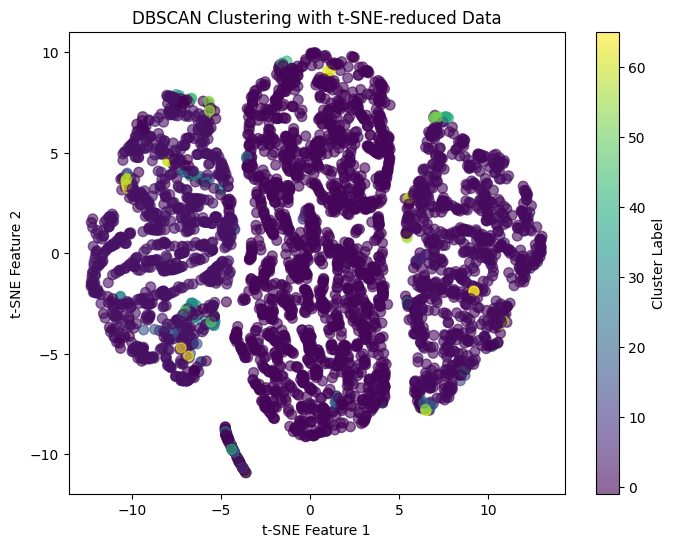

In [ ]:
from sklearn.manifold import TSNE

# t-SNE for dimensionality reduction to 2 dimensions
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_features = tsne.fit_transform(features_scaled)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(tsne_features[:, 0], tsne_features[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6)
plt.title("DBSCAN Clustering with t-SNE-reduced Data")
plt.xlabel("t-SNE Feature 1")
plt.ylabel("t-SNE Feature 2")
plt.colorbar(label='Cluster Label')
plt.show()

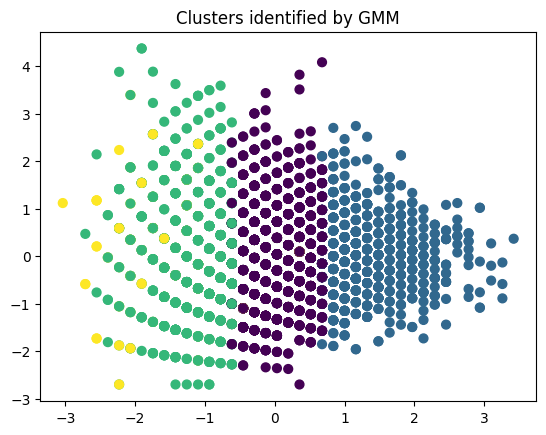

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs  # Used here for generating example data


# Number of clusters
n_clusters = 4

gmm = GaussianMixture(n_components=n_clusters, random_state=0)

# Fitting the model and predicting the clusters
gmm_labels = gmm.fit_predict(features_scaled)

# Plotting the clusters
plt.scatter(features_scaled.iloc[:, 0], features_scaled.iloc[:, 1], c=labels, cmap='viridis', s=40)
plt.title("Clusters identified by GMM")
plt.show()


In [ ]:
centers = gmm.means_
print("Cluster Centers:\n", centers)


Cluster Centers:
 [[ 3.54900763e-02  2.26336343e-03  3.27942839e-02  1.38320159e-02
   3.54900763e-02 -1.60128154e-01  4.90067405e-02 -3.02286354e-02
   0.00000000e+00]
 [ 1.35351743e+00 -2.69538188e-03  1.35565168e+00  1.10644958e-01
   1.35351743e+00 -1.60128154e-01  1.33829807e+00  1.40396754e+00
   2.00000000e+00]
 [-1.11990308e+00 -1.86415254e-03 -1.11483256e+00 -9.09678062e-02
  -1.11990308e+00 -1.60128154e-01 -1.12563171e+00 -1.06132639e+00
   1.00000000e+00]
 [-1.42926172e+00  1.47300147e-03 -1.45113505e+00 -3.32074860e-01
  -1.42926172e+00  6.24499800e+00 -1.48574379e+00 -1.26040437e+00
   9.30000000e-01]]


In [ ]:
from sklearn.metrics import silhouette_score
gmm_score = silhouette_score(features_scaled, gmm_labels)
print("Silhouette Score: ", gmm_score)


Silhouette Score:  0.2986139607973183


In [ ]:
from sklearn.metrics import calinski_harabasz_score
ch_score_gmm = calinski_harabasz_score(features_scaled, gmm_labels)
print("Calinski-Harabasz Score: ", ch_score_gmm)


Calinski-Harabasz Score:  1656.4152809319073


In [ ]:
from sklearn.metrics import davies_bouldin_score

db_index_gmm = davies_bouldin_score(features_scaled, gmm_labels)
db_index_gmm

1.4149995717127937

In [ ]:
print("Kmeans Sillhoutscore", kmeans_score)
print("DBScan Sillhoutscore", score_dbscan)
print("GMM Sillhoutescore", gmm_score)
print("\n")
print("Kmeans-Calinski-Harabasz-Score", ch_index)
print("DBScan-Calinski-Harabasz-Score", ch_score_dbscan)
print("GMM-Calinski-Harabasz-Score", ch_score_gmm)
print("\n")
print("Kmeans-davies_bouldin_score", db_index)
print("DBScan-davies_bouldin_score", db_index_dbscan)
print("GMM-davies_bouldin_score", db_index_gmm)



Kmeans Sillhoutscore 0.35620789944443665
DBScan Sillhoutscore 0.3828850648111339
GMM Sillhoutescore 0.2986139607973183


Kmeans-Calinski-Harabasz-Score 2427.422289413874
DBScan-Calinski-Harabasz-Score 2632.989199541128
GMM-Calinski-Harabasz-Score 1656.4152809319073


Kmeans-davies_bouldin_score 1.0509170068194926
DBScan-davies_bouldin_score 0.8796321225856658
GMM-davies_bouldin_score 1.4149995717127937


# ANALYSIS ON CLUSTER EVAUTION METRIC


**DBSCAN** seems to perform the best among all  three methods based on these metrics. This indicates it is able to find more meaningful, well-separated clusters for your dataset. This might be due to its ability to handle noise and identify clusters of arbitrary shape. *FAST*


**K-means** shows moderate performance, suggesting it can still find some structure in the data but might be limited by its assumption of spherical clusters. *RELATIVELY SLOW*


**GMM** appears to struggle the most with your dataset according to these metrics. This could be due to various reasons, such as the choice of the number of components, the complexity of the data, or the presence of noise. *FAST*







In [ ]:
import pandas as pd
features_scaled['Cluster'] = labels  # Assuming features_scaled is a DataFrame
cluster_summary = features_scaled.groupby('Cluster').mean()
print(cluster_summary)


           Degree  Clustering_Coefficient  EigenVector_Centrality  \
Cluster                                                             
0        0.035490                0.002263                0.032794   
1        1.353517               -0.002695                1.355652   
2       -1.119903               -0.001864               -1.114833   
3       -1.429262                0.001473               -1.451135   

         Average Neighbor Degree  Degree Centrality  Eccentricity  \
Cluster                                                             
0                       0.013832           0.035490     -0.160128   
1                       0.110645           1.353517     -0.160128   
2                      -0.090968          -1.119903     -0.160128   
3                      -0.332075          -1.429262      6.244998   

         Closeness Centrality  Betweenness Centrality  
Cluster                                                
0                    0.049007               -0.030229  
1 

<Axes: xlabel='Cluster', ylabel='Degree Centrality'>

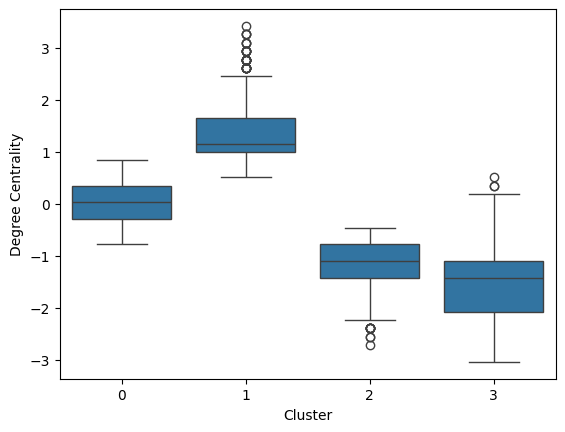

In [ ]:
import seaborn as sns
sns.boxplot(x='Cluster', y='Degree Centrality', data=features_scaled)


In [ ]:
!pip install networkx python-louvain



RUNNING COMMUNITY BASED ALGORITHM - GIRVAN NEWMAN

In [ ]:
import networkx as nx
from networkx.algorithms.community import girvan_newman



#  Girvan-Newman algorithm
communities = girvan_newman(subG)

#  access the communities
community_list = list(communities)

# first level of communities
print(community_list[0])


({2066, 2067, 39, 2091, 2096, 2099, 2104, 59, 63, 2117, 75, 77, 2133, 92, 2140, 98, 2155, 2158, 130, 2183, 141, 150, 2201, 2207, 2225, 181, 2232, 2235, 2238, 2240, 192, 2242, 195, 2241, 2246, 198, 2249, 2261, 2266, 2271, 2274, 227, 2282, 239, 247, 2302, 2309, 267, 275, 2327, 2328, 282, 288, 290, 2349, 305, 310, 322, 2371, 339, 2387, 342, 2393, 346, 355, 2405, 361, 371, 372, 2420, 374, 2419, 377, 386, 394, 2446, 404, 2455, 421, 2472, 2485, 438, 2487, 444, 448, 455, 462, 471, 2519, 474, 475, 481, 483, 498, 2553, 521, 2583, 539, 540, 543, 548, 2600, 2605, 2608, 560, 570, 2620, 2621, 2622, 2639, 596, 2649, 2673, 2675, 641, 2700, 656, 2725, 678, 689, 694, 700, 2754, 708, 712, 716, 2767, 2774, 732, 734, 751, 2803, 756, 2807, 764, 2814, 768, 776, 780, 784, 2845, 802, 2852, 806, 2858, 810, 826, 827, 2877, 831, 833, 2888, 2894, 847, 848, 2895, 850, 2899, 860, 865, 2916, 872, 878, 891, 893, 2943, 896, 898, 899, 2955, 919, 2975, 928, 946, 2996, 952, 3002, 3003, 957, 958, 3020, 972, 975, 3030, 303

GRAPH SAMPLING

In [ ]:
# import networkx as nx
# import random

# def random_node_sampling(G, fraction=0.1):
#     sampled_nodes = random.sample(G.nodes(), int(len(G.nodes()) * fraction))
#     return G.subgraph(sampled_nodes)

# def bfs_sampling(G, start_node, depth=2):
#     nodes = set([start_node])
#     nodes.update(nx.single_source_shortest_path_length(G, start_node, depth).keys())
#     return G.subgraph(nodes)


GRAPH PARTITIONING

In [ ]:
# # Assuming the use of a library like METIS for partitioning
# import metis
# import networkx as nx

# def partition_graph(G, num_partitions=4):
#     _, parts = metis.part_graph(G, num_partitions)
#     partitions = [[] for _ in range(num_partitions)]
#     for i, p in enumerate(parts):
#         partitions[p].append(i)
#     return partitions


PARALLEL PROCESSING

In [ ]:
# from joblib import Parallel, delayed
# import networkx as nx

# # Example: Parallel computation of centrality measures
# def compute_centrality(subgraph):
#     return nx.betweenness_centrality(subgraph)

# def parallel_centrality_computation(G, partitions):
#     subgraphs = [G.subgraph(nodes) for nodes in partitions]
#     results = Parallel(n_jobs=-1)(delayed(compute_centrality)(sg) for sg in subgraphs)
#     return results


# STATISTICAL ANALYSIS

In [ ]:
!pip install pandas numpy scipy sklearn matplotlib seaborn


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
import pandas as pd
import numpy as np
# Example DataFrame setup
# df = pd.DataFrame(data, columns=['Feature1', 'Feature2', ..., 'Cluster'])


In [ ]:
from scipy.spatial.distance import pdist, squareform

# calculate average pairwise distance within clusters
def avg_pairwise_distance(features_scaled, cluster_col='Cluster'):
    cluster_distances = {}
    for cluster in features_scaled[cluster_col].unique():
        cluster_data = features_scaled[features_scaled[cluster_col] == cluster].drop(columns=[cluster_col])
        distances = pdist(cluster_data, metric='euclidean')
        avg_distance = np.mean(distances)
        cluster_distances[cluster] = avg_distance
    return cluster_distances

# print average pairwise distances
cluster_distances = avg_pairwise_distance(features_scaled, 'Cluster')
print(cluster_distances)


{0: 2.0861861040732657, 1: 2.256120000739842, 2: 2.364226156065699, 3: 3.048385876017231}


# ***STATISTICAL SUMMARY PER CLUSTER ***

In [ ]:
# statistical summaries for each cluster
cluster_summaries = features_scaled.groupby('Cluster').describe()
print(cluster_summaries)


         Degree                                                             \
          count      mean       std      min       25%       50%       75%   
Cluster                                                                      
0        1913.0  0.035490  0.368711 -0.77666 -0.292055  0.031015  0.354085   
1         930.0  1.353517  0.529805  0.51562  1.000225  1.161760  1.646365   
2        1057.0 -1.119903  0.413497 -2.71508 -1.422800 -1.099730 -0.776660   
3         100.0 -1.429262  0.795317 -3.03815 -2.068940 -1.422800 -1.099730   

                 Clustering_Coefficient            ... Closeness Centrality  \
             max                  count      mean  ...                  75%   
Cluster                                            ...                        
0        0.83869                 1913.0  0.002263  ...             0.359125   
1        3.42325                  930.0 -0.002695  ...             1.632249   
2       -0.45359                 1057.0 -0.001864  ...    

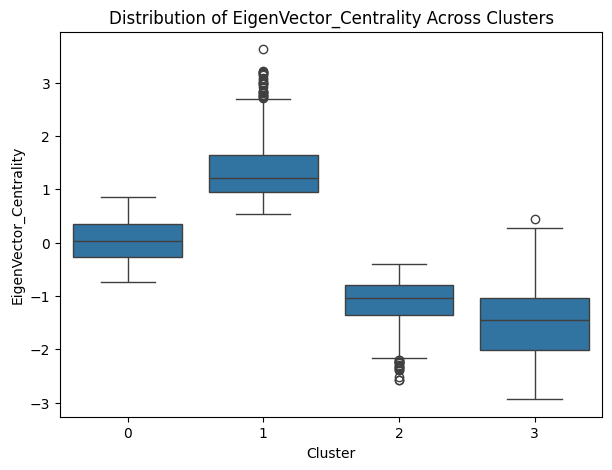

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example feature to visualize
feature_to_visualize = 'EigenVector_Centrality'

plt.figure(figsize=(7, 5))
sns.boxplot(x='Cluster', y=feature_to_visualize, data=features_scaled)
plt.title(f'Distribution of {feature_to_visualize} Across Clusters')
plt.show()


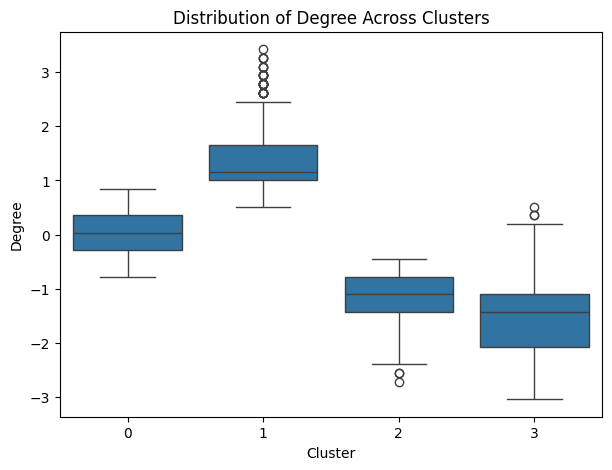

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example feature to visualize
feature_to_visualize = 'Degree'

plt.figure(figsize=(7, 5))
sns.boxplot(x='Cluster', y=feature_to_visualize, data=features_scaled)
plt.title(f'Distribution of {feature_to_visualize} Across Clusters')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#feature to visualize
feature_to_visualize = 'Degree Centrality'

plt.figure(figsize=(7, 5))
sns.boxplot(x='Cluster', y=feature_to_visualize, data=features_scaled)
plt.title(f'Distribution of {feature_to_visualize} Across Clusters')
plt.show()




In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example feature to visualize
feature_to_visualize = 'Eccentricity'

plt.figure(figsize=(7, 5))
sns.boxplot(x='Cluster', y=feature_to_visualize, data=features_scaled)
plt.title(f'Distribution of {feature_to_visualize} Across Clusters')
plt.show()


